In [8]:
# '''1. Fetching Stock Data with yfinance
#             fetch the stock data using the yfinance library. Let’s use Apple (AAPL):'''
import yfinance as yf
import pandas as pd

# Fetch stock data for Apple
df = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

# Preview the data
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447412  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458560  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355828  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344078  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386256  7.570714  7.571429  7.466429  7.510714  447610800


In [3]:
import yfinance as yf
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Fetch stock data (example: Apple)
df = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

# Ensure 'Close' is a pandas Series and check its shape
close = df['Close']
print("Close shape before squeeze:", close.shape)  # Should output (3522,)

# Convert to 1D numpy array explicitly
close = close.squeeze()  # This will convert (3522, 1) to (3522,)

print("Close shape after squeeze:", close.shape)  # Should output (3522,)

# Calculate Bollinger Bands using 'Close' (now a 1D numpy array)
bb = BollingerBands(close)
df['bb_bbm'] = bb.bollinger_mavg()

# Calculate RSI using 'Close'
rsi = RSIIndicator(close)
df['rsi'] = rsi.rsi()

# Calculate MACD using 'Close'
macd = MACD(close)
df['macd'] = macd.macd()

# Drop rows with missing values (NaN values may arise from technical indicator calculations)
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['bb_bbm', 'rsi', 'macd']]
y = df['Close']

# Check the resulting DataFrame
print(df.head())


[*********************100%***********************]  1 of 1 completed

Close shape before squeeze: (3522, 1)
Close shape after squeeze: (3522,)
Price      Adj Close     Close      High       Low      Open     Volume  \
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL   
Date                                                                      
2010-02-09  5.910554  7.006786  7.053571  6.955357  7.015000  632886800   
2010-02-10  5.878319  6.968571  7.021429  6.937857  6.996071  370361600   
2010-02-11  5.985269  7.095357  7.133929  6.930714  6.960000  550345600   
2010-02-12  6.036785  7.156429  7.201429  6.982143  7.075357  655468800   
2010-02-16  6.127768  7.264286  7.274643  7.197143  7.212143  543737600   

Price         bb_bbm        rsi      macd  
Ticker                                     
Date                                       
2010-02-09  7.218214  42.054113 -0.160856  
2010-02-10  7.195714  41.000213 -0.157318  
2010-02-11  7.174321  45.848891 -0.142640  
2010-02-12  7.158161  48.063030 -0.124643  
2010-02-16  7.1536

[*********************100%***********************]  1 of 1 completed
c:\Users\GANESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Close shape before squeeze: (3522, 1)
Close shape after squeeze: (3522,)
Model: Linear Regression
R-squared: 0.9502
Mean Absolute Error: 3.3889

Model: Random Forest
R-squared: -1.6439
Mean Absolute Error: 26.1316



c:\Users\GANESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Extra Trees
R-squared: -1.5103
Mean Absolute Error: 25.2872

Model: K-Nearest Neighbors
R-squared: -1.4746
Mean Absolute Error: 24.5879

Model: XGBoost
R-squared: -1.3716
Mean Absolute Error: 24.3100



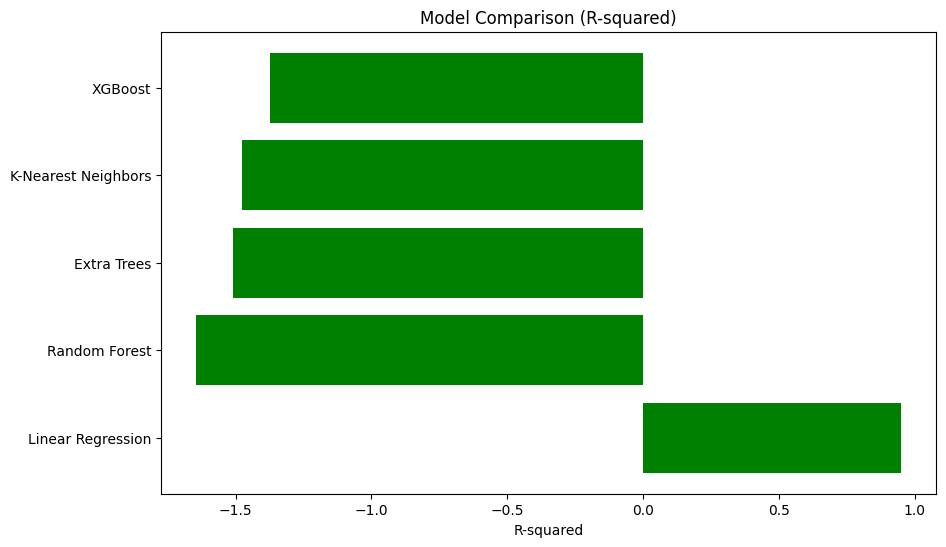

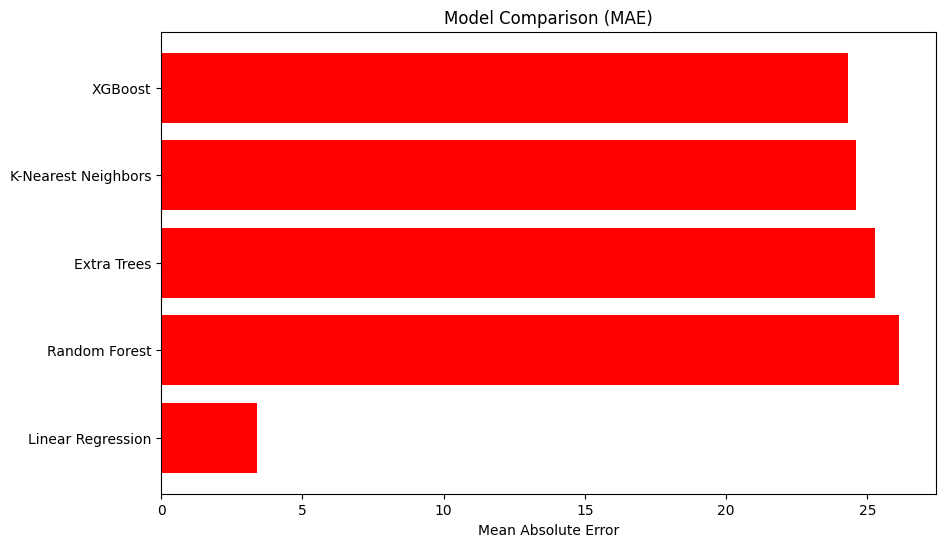

In [4]:
import yfinance as yf
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.trend import MACD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Fetch stock data (example: Apple)
df = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

# Ensure 'Close' is a pandas Series and check its shape
close = df['Close']
print("Close shape before squeeze:", close.shape)  # Should output (3522,)

# Convert to 1D numpy array explicitly
close = close.squeeze()  # This will convert (3522, 1) to (3522,)

print("Close shape after squeeze:", close.shape)  # Should output (3522,)

# Calculate Bollinger Bands using 'Close' (now a 1D numpy array)
bb = BollingerBands(close)
df['bb_bbm'] = bb.bollinger_mavg()

# Calculate RSI using 'Close'
rsi = RSIIndicator(close)
df['rsi'] = rsi.rsi()

# Calculate MACD using 'Close'
macd = MACD(close)
df['macd'] = macd.macd()

# Drop rows with missing values (NaN values may arise from technical indicator calculations)
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['bb_bbm', 'rsi', 'macd']]
y = df['Close']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# List of models to train
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

# Dictionary to store the evaluation results
model_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the results
    model_results[model_name] = {
        "R-squared": r2,
        "Mean Absolute Error": mae
    }

    # Print the evaluation metrics for each model
    print(f"Model: {model_name}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}\n")

# Plotting comparison of models based on R-squared
model_names = list(model_results.keys())
r2_scores = [model_results[model]["R-squared"] for model in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='green')
plt.xlabel('R-squared')
plt.title('Model Comparison (R-squared)')
plt.show()

# Plotting comparison of models based on Mean Absolute Error
mae_scores = [model_results[model]["Mean Absolute Error"] for model in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, mae_scores, color='red')
plt.xlabel('Mean Absolute Error')
plt.title('Model Comparison (MAE)')
plt.show()


In [18]:
import yfinance as yf

# S&P 500 symbols
sp500_symbols = yf.Ticker("^GSPC").history(period="1d")
print("S&P 500 symbols:", sp500_symbols)


S&P 500 symbols:                                  Open         High         Low        Close  \
Date                                                                          
2024-11-29 00:00:00-05:00  6003.97998  6044.169922  6003.97998  6032.379883   

                               Volume  Dividends  Stock Splits  
Date                                                            
2024-11-29 00:00:00-05:00  2444420000        0.0           0.0  


In [ ]:
# import pandas as pd
# import yfinance as yf
# import requests

# # Fetch the list of S&P 500 companies from Wikipedia
# url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
# html = requests.get(url).text
# df = pd.read_html(html)[0]

# # Extract the stock tickers (Company symbols)
# sp500_tickers = df['Symbol'].tolist()

# # Display the tickers (First 10 as example) 
# print("List of S&P 500 Stock Tickers:")
# print(sp500_tickers[:10])  # Display the first 10 tickers

# # Now, if you want to download the data for these stocks using yfinance:
# for ticker in sp500_tickers:
#     stock_data = yf.download(ticker, start="2010-01-01", end="2024-01-01")
#     print(f"\nDownloaded data for: {ticker}")
#     print(stock_data.head())


In [6]:
import pandas as pd

# Example dataset (replace this with your own dataset)
df = pd.DataFrame({
    'symbol': ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA'],
    'date': ['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01'],
    'close': [150, 1340, 1850, 220, 700]
})

# Display unique stock symbols (tickers)
stock_symbols = df['symbol'].unique()

# Output the stock symbols
print("Unique Stock Symbols in the dataset:")
print(stock_symbols)


Unique Stock Symbols in the dataset:
['AAPL' 'GOOG' 'AMZN' 'MSFT' 'TSLA']
